# Car Price Prediction::

Download dataset from this link:

https://www.kaggle.com/hellbuoy/car-price-prediction

# Problem Statement::

A Chinese automobile company Geely Auto aspires to enter the US market by setting up their manufacturing unit there and producing cars locally to give competition to their US and European counterparts.

They have contracted an automobile consulting company to understand the factors on which the pricing of cars depends. Specifically, they want to understand the factors affecting the pricing of cars in the American market, since those may be very different from the Chinese market. The company wants to know:

Which variables are significant in predicting the price of a car
How well those variables describe the price of a car
Based on various market surveys, the consulting firm has gathered a large data set of different types of cars across the America market.

# task::
We are required to model the price of cars with the available independent variables. It will be used by the management to understand how exactly the prices vary with the independent variables. They can accordingly manipulate the design of the cars, the business strategy etc. to meet certain price levels. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

# WORKFLOW ::

1.Load Data

2.Check Missing Values ( If Exist ; Fill each record with mean of its feature )

3.Split into 50% Training(Samples,Labels) , 30% Test(Samples,Labels) and 20% Validation Data(Samples,Labels).

4.Model : input Layer (No. of features ), 3 hidden layers including 10,8,6 unit & Output Layer with activation function relu/tanh (check by experiment).

5.Compilation Step (Note : Its a Regression problem , select loss , metrics according to it)
6.Train the Model with Epochs (100) and validate it

7.If the model gets overfit tune your model by changing the units , No. of layers , activation function , epochs , add dropout layer or add Regularizer according to the need .

8.Evaluation Step

9.Prediction

In [2]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [3]:
data = pd.read_csv("data/CarPrice_Assignment.csv")
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [4]:
data['CarName'] = data['CarName'].apply(lambda a: a.split(' ')[0])   # extracting brands and replacing
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
names = {
    'Nissan':'nissan',
    'maxda':'mazda',
    'porcshce':'porsche',
    'toyouta':'toyota',
    'vokswagen':'volkswagen',
    'vw':'volkswagen'
}

In [6]:
data.CarName.str.lower()
data.CarName = data.CarName.replace(names.keys(), names.values())
data.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [8]:
data.loc[data.duplicated()]

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


In [9]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data['fueltype'] = labelencoder.fit_transform(data['fueltype'])
data['aspiration'] = labelencoder.fit_transform(data['aspiration'])
data['carbody'] = labelencoder.fit_transform(data['carbody'])
data['drivewheel'] = labelencoder.fit_transform(data['drivewheel'])
data['enginelocation'] = labelencoder.fit_transform(data['enginelocation'])
data['fuelsystem'] = labelencoder.fit_transform(data['fuelsystem'])
data['CarName'] = labelencoder.fit_transform(data['CarName'])

In [10]:
np.unique(data['CarName'])

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21])

In [11]:
data.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

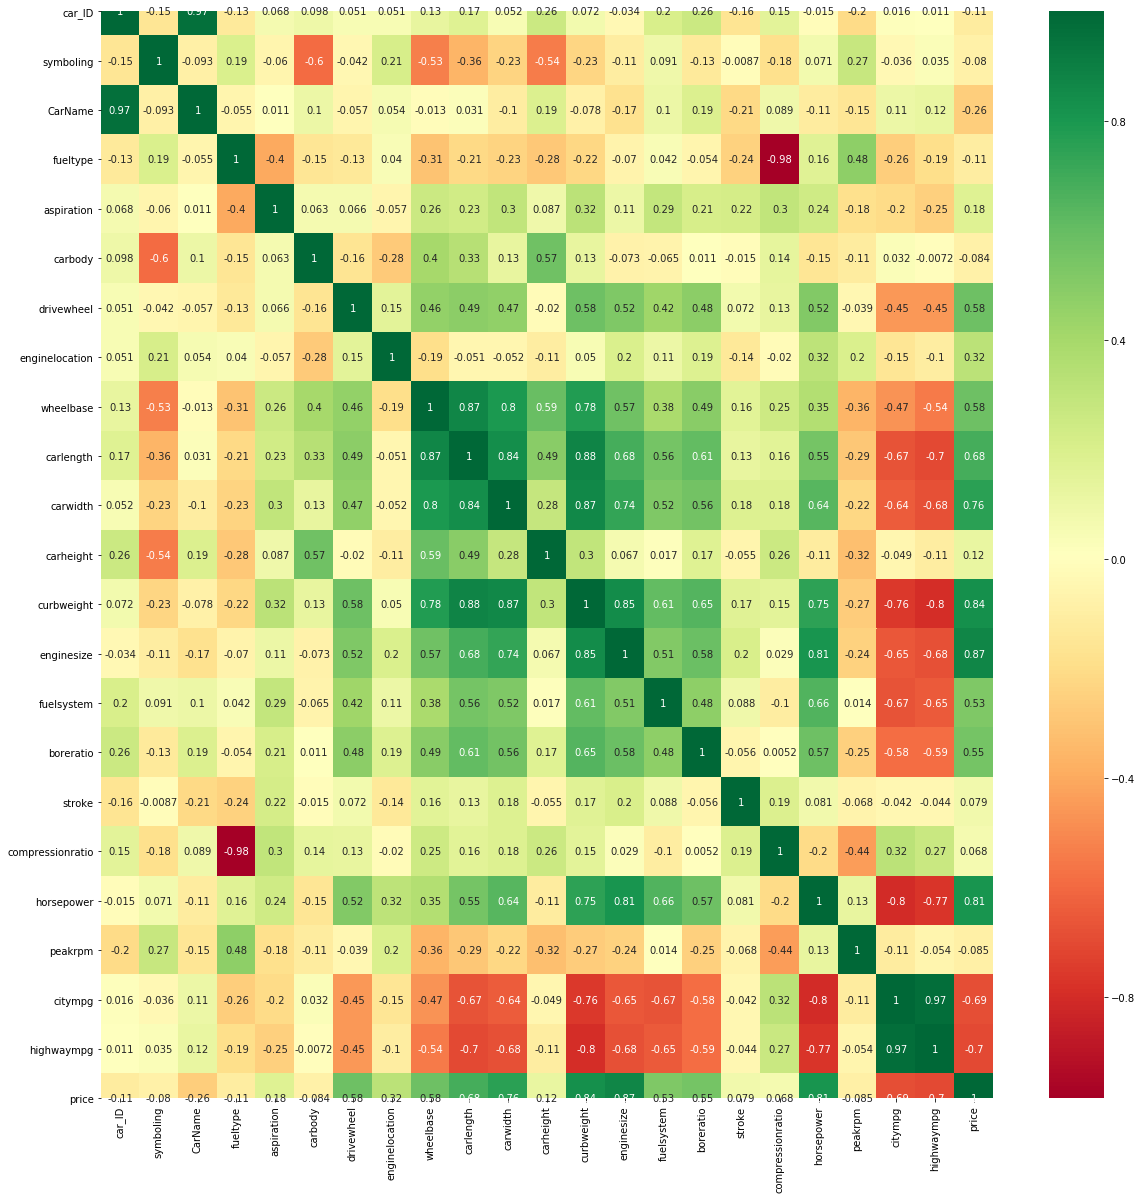

In [12]:
corrm = data.corr()
top_corr = corrm.index
plt.figure(figsize = (20, 20))
sns.heatmap(data[top_corr].corr(), annot = True, cmap="RdYlGn")
plt.show()

In [13]:
featurs = data[['CarName','drivewheel', 'wheelbase', 'curbweight','enginelocation', 
                'enginesize', 'boreratio', 'horsepower', 'carlength', 'carwidth', 'price']]
featurs

,CarName,drivewheel,wheelbase,curbweight,enginelocation,enginesize,boreratio,horsepower,carlength,carwidth,price
0,0,2,88.6,2548,0,130,3.47,111,168.8,64.1,13495.0
1,0,2,88.6,2548,0,130,3.47,111,168.8,64.1,16500.0
2,0,2,94.5,2823,0,152,2.68,154,171.2,65.5,16500.0
3,1,1,99.8,2337,0,109,3.19,102,176.6,66.2,13950.0
4,1,0,99.4,2824,0,136,3.19,115,176.6,66.4,17450.0
...,...,...,...,...,...,...,...,...,...,...,...
200,21,2,109.1,2952,0,141,3.78,114,188.8,68.9,16845.0
201,21,2,109.1,3049,0,141,3.78,160,188.8,68.8,19045.0
202,21,2,109.1,3012,0,173,3.58,134,188.8,68.9,21485.0
203,21,2,109.1,3217,0,145,3.01,106,188.8,68.9,22470.0


In [14]:
print(featurs.shape)

(205, 11)


In [15]:
train_data = featurs.loc[:, featurs.columns != 'price']
train_label = featurs.loc[:, featurs.columns == 'price']

from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(train_data, train_label, test_size = 0.30, random_state = 42)

In [16]:
print(x_train.shape)
print(x_test.shape)

(143, 10)
(62, 10)


In [17]:
print(y_train.shape)
print(y_test.shape)

(143, 1)
(62, 1)


In [18]:
x_train

,CarName,drivewheel,wheelbase,curbweight,enginelocation,enginesize,boreratio,horsepower,carlength,carwidth
177,19,1,102.4,2458,0,122,3.31,92,175.6,66.5
75,10,2,102.7,2910,0,140,3.78,175,178.4,68.0
174,19,1,102.4,2480,0,110,3.27,73,175.6,66.5
31,6,1,86.6,1819,0,92,2.91,76,144.6,63.9
12,2,2,101.2,2710,0,164,3.31,121,176.8,64.8
...,...,...,...,...,...,...,...,...,...,...
106,12,2,99.2,3139,0,181,3.43,160,178.5,67.9
14,2,2,103.5,3055,0,164,3.31,121,189.0,66.9
92,12,1,94.5,1938,0,97,3.15,69,165.3,63.8
179,19,2,102.9,3016,0,171,3.27,161,183.5,67.7


In [19]:
from keras import models
from keras import layers
from keras import regularizers

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(32, activation='relu', input_shape=(x_train.shape[1],)))
#     model.add(layers.Dense(16, kernel_regularizer=regularizers.l1_l2(l1=0.001, l2=0.001), activation='relu'))
    
#     model.add(layers.Dense(8, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
    model.add(layers.Dense(16, activation='relu'))
#     model.add(layers.Dense(8, activation='relu'))
    model.add(layers.Dense(16, activation='relu'))
    
    model.add(layers.Dense(1))
    
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

Using TensorFlow backend.


In [20]:
model = build_model()

model.fit(x_train, y_train, epochs = 100)


Epoch 1/100
143/143 [==============================] - 0s 752us/step - loss: 221677197.6503 - mae: 12743.0879
Epoch 2/100
143/143 [==============================] - 0s 56us/step - loss: 214554241.0070 - mae: 12488.0742
Epoch 3/100
143/143 [==============================] - 0s 56us/step - loss: 208259667.6923 - mae: 12264.1836
Epoch 4/100
143/143 [==============================] - 0s 70us/step - loss: 201764259.0769 - mae: 12014.5039
Epoch 5/100
143/143 [==============================] - 0s 49us/step - loss: 195350678.6014 - mae: 11767.3252
Epoch 6/100
143/143 [==============================] - 0s 49us/step - loss: 188201192.3916 - mae: 11496.4111
Epoch 7/100
143/143 [==============================] - 0s 63us/step - loss: 180730359.4406 - mae: 11195.2129
Epoch 8/100
143/143 [==============================] - 0s 63us/step - loss: 172847991.6084 - mae: 10876.6611
Epoch 9/100
143/143 [==============================] - 0s 49us/step - loss: 164388210.6294 - mae: 10510.1240
Epoch 10/100
143/

143/143 [==============================] - 0s 49us/step - loss: 31061960.6993 - mae: 4135.0806
Epoch 75/100
143/143 [==============================] - 0s 49us/step - loss: 31248614.7413 - mae: 4196.9009
Epoch 76/100
143/143 [==============================] - 0s 49us/step - loss: 30960678.0979 - mae: 4197.0342
Epoch 77/100
143/143 [==============================] - 0s 42us/step - loss: 31312797.3706 - mae: 4207.2378
Epoch 78/100
143/143 [==============================] - 0s 42us/step - loss: 31093017.9580 - mae: 4238.9209
Epoch 79/100
143/143 [==============================] - 0s 42us/step - loss: 31035628.6154 - mae: 4267.1602
Epoch 80/100
143/143 [==============================] - 0s 49us/step - loss: 30817709.3147 - mae: 4220.9126
Epoch 81/100
143/143 [==============================] - 0s 49us/step - loss: 31243036.5175 - mae: 4292.5269
Epoch 82/100
143/143 [==============================] - 0s 42us/step - loss: 30827258.7692 - mae: 4099.5215
Epoch 83/100
143/143 [===================

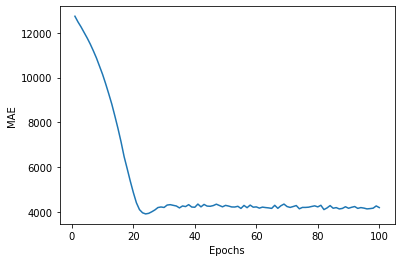

In [21]:
mae = model.history.history['mae']
plt.plot(range(1, len(mae) + 1), mae)
plt.xlabel('Epochs')
plt.ylabel('MAE')
plt.show()

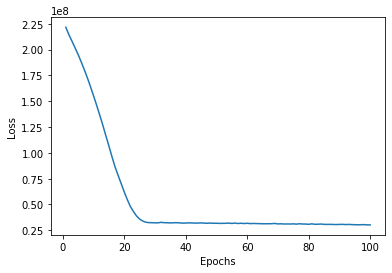

In [22]:
loss = model.history.history['loss']
plt.plot(range(1, len(loss) + 1), loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [23]:
result = model.evaluate(x_test, y_test)
result

62/62 [==============================] - 0s 306us/step


[36946207.161290325, 4278.68115234375]

### minimizing over fitting

In [24]:
# using K_fold validation technique

k = 4
num_val_samples = len(train_data) // k
# num_epochs = 500
num_epochs = 100
all_history = []
for i in range(k):
    print('processing fold #', i)
    
    val_data = train_data[i * num_val_samples: (i + 1) * num_val_samples]
    
    val_targets = train_label[i * num_val_samples: (i + 1) * num_val_samples]
    
    partial_train_data = np.concatenate(
            [train_data[:i * num_val_samples],
            train_data[(i + 1) * num_val_samples:]],
            axis=0)
    
    partial_train_targets = np.concatenate(
            [train_label[:i * num_val_samples],
            train_label[(i + 1) * num_val_samples:]],
            axis=0)
    
    
    model = build_model()
    model.fit(partial_train_data, partial_train_targets,
    epochs=num_epochs, batch_size=1, verbose=0)
    all_history.append(model.history.history)
    if k == i+1:
        print("-------------Training Completed-------------")

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3
-------------Training Completed-------------


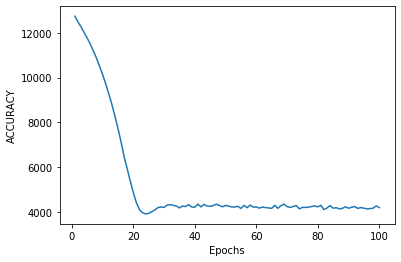

In [32]:
acc = model.history.history['mae']
plt.plot(range(1, len(mae) + 1), mae)
plt.xlabel('Epochs')
plt.ylabel('ACCURACY')
plt.show()

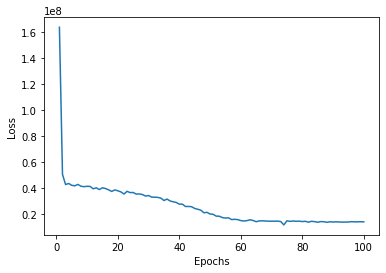

In [31]:
loss = model.history.history['loss']
plt.plot(range(1, len(loss) + 1), loss)
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.show()

In [26]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_17 (Dense)             (None, 32)                352       
_________________________________________________________________
dense_18 (Dense)             (None, 16)                528       
_________________________________________________________________
dense_19 (Dense)             (None, 16)                272       
_________________________________________________________________
dense_20 (Dense)             (None, 1)                 17        
Total params: 1,169
Trainable params: 1,169
Non-trainable params: 0
_________________________________________________________________


In [27]:
model.evaluate(x_test, y_test)

62/62 [==============================] - 0s 748us/step


[14022298.806451613, 2601.119873046875]